In [20]:
import riskfolio.Reports as rp
import pickle
import matplotlib.pyplot as plt

In [22]:
from src.models.utils import get_current_port, get_advised_port, get_recommendation

In [28]:
from src.models.load_data import Singleton, Balance, Instruments, PriceDB, AdvisedPortfolios

In [31]:
instruments_m = Instruments.instance().data

In [32]:
advised_pf = AdvisedPortfolios.instance().data

In [36]:
adv_st = advised_pf.merge(instruments_m.loc[:, ['itemcode', 'strategy']], left_on='itemcode', right_on='itemcode', how='left')

In [66]:
adv_st.loc[adv_st.strategy=='Satellite']

,date,risk_profile,itemcode,weights,tracking_code,itemname,price,volume,trading_amt_mln,asset_class,strategy
14,2019-01-01,3,A091170,0.073677,BANK_KRX,KODEX 은행,NaN,NaN,NaN,Equity,Satellite
16,2019-01-01,3,A283580,0.010323,CSI300,KODEX 중국본토CSI300,NaN,NaN,NaN,Equity,Satellite
19,2019-01-01,4,A245340,0.240000,DOW30,TIGER 미국다우존스30,NaN,NaN,NaN,Equity,Satellite
37,2019-01-02,3,A091170,0.073677,BANK_KRX,KODEX 은행,6810.0,32112.0,667.578119,Equity,Satellite
39,2019-01-02,3,A283580,0.010323,CSI300,KODEX 중국본토CSI300,7430.0,66145.0,418.124125,Equity,Satellite
...,...,...,...,...,...,...,...,...,...,...,...
12919,2021-03-18,4,A266370,0.136000,IT,KODEX IT,21445.0,29031.0,1149.977097,Equity,Satellite
12932,2021-03-19,3,A283580,0.084000,CSI300,KODEX 중국본토CSI300,13770.0,48977.0,1617.194908,Equity,Satellite
12938,2021-03-19,4,A139260,0.240000,K200_IT,TIGER 200 IT,38785.0,248397.0,29020.115748,Equity,Satellite
12939,2021-03-19,4,A157490,0.240000,SW,TIGER 소프트웨어,17000.0,188055.0,2484.755538,Equity,Satellite


In [68]:
asset = adv_st.loc[:, ['date', 'asset_class', 'weights', 'risk_profile']].groupby(by=['date','risk_profile',  'asset_class']).sum()

In [73]:
asset

,date,risk_profile,asset_class,weights
0,2019-01-01,2,Alternative,0.02
1,2019-01-01,2,Equity,0.10
2,2019-01-01,2,Fixed Income,0.88
3,2019-01-01,3,Alternative,0.02
4,2019-01-01,3,Equity,0.40
...,...,...,...,...
5206,2021-03-19,3,Equity,0.40
5207,2021-03-19,3,Fixed Income,0.58
5208,2021-03-19,4,Alternative,0.24
5209,2021-03-19,4,Equity,0.70


In [71]:
asset = asset.reset_index()

In [77]:
asset.loc[(asset.risk_profile==2)&(asset.asset_class=='Equity'),:].max()

date            2021-03-19
risk_profile             2
asset_class         Equity
weights                0.1
dtype: object

In [46]:
cs = adv_st.loc[:, ['date', 'strategy', 'weights', 'risk_profile']].groupby(by=['date','risk_profile',  'strategy']).sum()

In [49]:
cs

weights
date       risk_profile strategy          
2019-01-01 2            Core         0.120
           3            Core         0.336
                        Satellite    0.084
           4            Core         0.360
                        Satellite    0.240
...                                    ...
2021-03-19 2            Core         0.120
           3            Core         0.336
                        Satellite    0.084
           4            Core         0.324
                        Satellite    0.616

[2895 rows x 1 columns]

In [57]:
cs = cs.reset_index()

In [64]:
cs.loc[(cs.risk_profile==3)&(cs.strategy=='Satellite'),:]

,date,risk_profile,strategy,weights
2,2019-01-01,3,Satellite,0.084
7,2019-01-02,3,Satellite,0.084
12,2019-01-03,3,Satellite,0.084
17,2019-01-04,3,Satellite,0.084
22,2019-01-07,3,Satellite,0.084
...,...,...,...,...
2872,2021-03-15,3,Satellite,0.084
2877,2021-03-16,3,Satellite,0.084
2882,2021-03-17,3,Satellite,0.084
2887,2021-03-18,3,Satellite,0.084


In [78]:
cs.loc[(cs.risk_profile==4)&(cs.strategy=='Satellite'),:].max()

date            2021-03-19
risk_profile             4
strategy         Satellite
weights              0.616
dtype: object

In [113]:
old_pt = get_advised_port(risk_profile=3)
new_pt = get_advised_port(risk_profile=4)

In [114]:
old_pt

,date,itemcode,wt,tracking_code,itemname,price,volume,trading_amt_mln,asset_class,exposure
0,2021-03-19,A148070,0.240000,KTB_D8,KOSEF 국고채10년,119780.0,3986.0,1422.449033,Fixed Income,FI_D_LONG
1,2021-03-19,A069500,0.240000,K200,KODEX 200,41855.0,9277711.0,421471.700934,Equity,EQ_M_KR_LARGE
2,2021-03-19,A114260,0.240000,KTB_D3,KODEX 국고채3년,57900.0,1893.0,825.848869,Fixed Income,FI_D_SHORT
3,2021-03-19,A283580,0.084000,CSI300,KODEX 중국본토CSI300,13770.0,48977.0,1617.194908,Equity,EQ_M_CH_LARGE
4,2021-03-19,A273130,0.063949,ACT_BOND_D4,KODEX 종합채권(AA-이상)액티브,108565.0,3011.0,2012.456380,Fixed Income,FI_D_LONG
5,2021-03-19,A251350,0.062921,MSCI_WO,KODEX 선진국MSCI World,17750.0,23246.0,3022.359487,Equity,EQ_M_DM_LARGE
6,2021-03-19,A122260,0.036051,BOK_D1,KOSEF 통안채1년,101185.0,137782.0,47097.865417,Fixed Income,FI_D_SHORT
7,2021-03-19,A237370,0.020000,BAL_KO3KTB7,KODEX 배당성장채권혼합,11750.0,9292.0,105.542692,Alternative,AL_BAL_E3F7
8,2021-03-19,A278540,0.013079,MSCI_KR,KODEX MSCI Korea TR,13460.0,112916.0,19711.959958,Equity,EQ_M_KR_LARGE


In [116]:
old_pt['p2'] = old_pt['price']*old_pt['wt']

In [117]:
old_pt['p2']

0    28747.200000
1    10045.200000
2    13896.000000
3     1156.680000
4     6942.569472
5     1116.849127
6     3647.870496
7      235.000000
8      176.042296
Name: p2, dtype: float64

In [111]:
import pandas as pd
import numpy as np

In [110]:
d = pd.merge(old_pt.loc[:, ['itemcode', 'wt']], new_pt.loc[:, ['itemcode', 'wt']], left_on='itemcode', right_on='itemcode', how='outer', suffixes=('_x', '_y'))

In [112]:
d

,itemcode,wt_x,wt_y
0,A148070,0.240000,0.060
1,A069500,0.240000,NaN
2,A114260,0.240000,NaN
3,A283580,0.084000,NaN
4,A273130,0.063949,NaN
5,A251350,0.062921,0.084
6,A122260,0.036051,NaN
7,A237370,0.020000,0.240
8,A278540,0.013079,NaN
9,A139260,NaN,0.240


In [122]:
with open('returns-riskprofile-2.pkl', 'rb') as f:
    returns = pickle.load(f)
    
with open('w-riskprofile-2.pkl', 'rb') as f:
    w = pickle.load(f)

In [129]:
import riskfolio.RiskFunctions as rk

def plot_hist(returns, w, alpha=0.05, bins=50, height=6, width=10, ax=None):
    r"""
    Create a histogram of portfolio returns with the risk measures.

    Parameters
    ----------
    returns : DataFrame
        Assets returns.
    w : DataFrame of shape (n_assets, 1)
        Portfolio weights.
    alpha : float, optional
        Significante level of VaR, CVaR and EVaR. The default is 0.05.
    bins : float, optional
        Number of bins of the histogram. The default is 50.
    height : float, optional
        Height of the image in inches. The default is 6.
    width : float, optional
        Width of the image in inches. The default is 10.
    ax : matplotlib axis, optional
        If provided, plot on this axis. The default is None.

    Raises
    ------
    ValueError
        When the value cannot be calculated.

    Returns
    -------
    ax : matplotlib axis.
        Returns the Axes object with the plot for further tweaking.

    Example
    -------
    ::

        ax = plf.plot_hist(returns=Y, w=w1, alpha=0.05, bins=50, height=6,
                           width=10, ax=None)

    .. image:: images/Histogram.png


    """

    if not isinstance(returns, pd.DataFrame):
        raise ValueError("returns must be a DataFrame")

    if not isinstance(w, pd.DataFrame):
        raise ValueError("w must be a DataFrame")

    if w.shape[1] > 1 and w.shape[0] == 0:
        w = w.T
    elif w.shape[1] > 1 and w.shape[0] > 0:
        raise ValueError("w must be a  DataFrame")

    if returns.shape[1] != w.shape[0]:
        a1 = str(returns.shape)
        a2 = str(w.shape)
        raise ValueError("shapes " + a1 + " and " + a2 + " not aligned")

    if ax is None:
        ax = plt.gca()
        fig = plt.gcf()
        fig.set_figwidth(width)
        fig.set_figheight(height)

    a = np.array(returns, ndmin=2) @ np.array(w, ndmin=2)
    ax.set_title("Portfolio Returns Histogram")
    n, bins1, patches = ax.hist(
        a, bins, density=1, edgecolor="skyblue", color="skyblue", alpha=0.5
    )
    mu = np.mean(a)
    sigma = np.std(a, axis=0, ddof=1).item()
    risk = [
        mu,
        mu - sigma,
        mu - rk.MAD(a),
        -rk.VaR_Hist(a, alpha),
        -rk.CVaR_Hist(a, alpha),
        -rk.EVaR_Hist(a, alpha)[0],
        -rk.WR(a),
    ]
    label = [
        "Mean: " + "{0:.2%}".format(risk[0]),
        "Mean - Std. Dev.("
        + "{0:.2%}".format(-risk[1] + mu)
        + "): "
        + "{0:.2%}".format(risk[1]),
        "Mean - MAD("
        + "{0:.2%}".format(-risk[2] + mu)
        + "): "
        + "{0:.2%}".format(risk[2]),
        "{0:.2%}".format((1 - alpha)) + " Confidence VaR: " + "{0:.2%}".format(risk[3]),
        "{0:.2%}".format((1 - alpha))
        + " Confidence CVaR: "
        + "{0:.2%}".format(risk[4]),
        "{0:.2%}".format((1 - alpha))
        + " Confidence EVaR: "
        + "{0:.2%}".format(risk[5]),
        "Worst Realization: " + "{0:.2%}".format(risk[6]),
    ]
    
    return label, fig

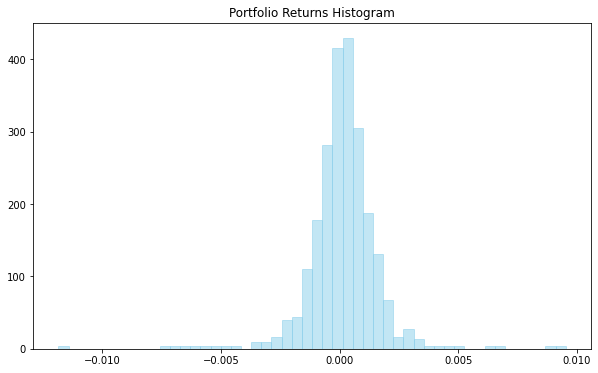

In [131]:
label, fig = plot_hist(returns, w, alpha=0.05, bins=50, height=6, width=10, ax=None)

In [134]:
label

['Mean: 0.01%',
 'Mean - Std. Dev.(0.15%): -0.14%',
 'Mean - MAD(0.09%): -0.08%',
 '95.00% Confidence VaR: -0.19%',
 '95.00% Confidence CVaR: -0.35%',
 '95.00% Confidence EVaR: -0.70%',
 'Worst Realization: -1.19%']

In [84]:
returns

itemcode,A069500,A278540,A229200,A196230,A130730,A122260,A139260,A251350,A091160,A091180,...,A102780,A214980,A157490,A148070,A266370,A114260,A195930,A273130,A245340,A237370
date,,,,,,,,,,,,,,,,,,,,,
2018-04-02,-0.002337,-0.002609,-0.010612,-0.000040,0.000000,-0.000052,-0.003469,0.001688,-0.015074,0.022307,...,0.000000,0.000000,-0.009047,-0.001300,-0.012551,-0.000185,-0.012270,0.000000,-0.010032,-0.002734
2018-04-03,-0.002041,-0.004713,0.009952,0.000040,0.000093,0.000499,-0.001070,-0.024324,-0.003460,0.021562,...,-0.006245,0.000101,-0.004034,-0.000304,0.004629,0.000904,-0.003665,0.000200,-0.015569,0.000472
2018-04-04,-0.015525,-0.014275,-0.010953,0.000200,0.000103,0.000000,-0.032221,0.016281,-0.017880,0.021107,...,-0.017044,0.000142,-0.033591,0.000784,-0.034896,0.000369,-0.000459,0.000551,0.005846,-0.002267
2018-04-05,0.013782,0.012173,0.010359,0.000050,0.000196,0.000301,0.017893,0.006777,0.019808,-0.013212,...,0.014272,0.000101,0.005242,0.001088,0.020598,0.000092,0.010959,0.000850,0.017094,0.002267
2018-04-06,-0.004876,-0.003689,-0.002911,0.000140,0.000103,0.000093,-0.008131,0.013001,-0.010828,-0.011252,...,0.000000,0.000152,-0.011232,0.001252,-0.003389,0.001363,0.008141,0.000300,0.004188,-0.001416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-26,-0.027589,-0.021559,-0.011007,-0.000048,0.000000,0.000000,-0.021252,-0.008586,-0.007585,-0.023972,...,-0.017024,-0.000097,-0.026313,0.000817,-0.014163,-0.000258,-0.016139,-0.000455,-0.006997,-0.002525
2021-01-27,-0.003377,-0.007171,-0.011788,0.000048,0.000099,-0.000049,-0.005264,-0.000595,-0.015481,-0.006084,...,0.008778,0.000000,0.013697,-0.000163,-0.007268,0.000344,0.008723,0.000592,0.002921,-0.001687
2021-01-28,-0.018604,-0.016325,-0.018282,0.000048,0.000000,0.000099,-0.025146,-0.009867,-0.028206,-0.025924,...,-0.024210,0.000097,0.000302,0.000041,-0.025749,0.000086,-0.017943,0.000046,-0.008790,-0.003806


In [12]:
from src.models.load_data import AdvisedPortfolios

In [94]:
dates[20::20]

array(['2019-01-29', '2019-02-26', '2019-03-26', '2019-04-23',
       '2019-05-21', '2019-06-18', '2019-07-16', '2019-08-13',
       '2019-09-10', '2019-10-08', '2019-11-05', '2019-12-03',
       '2019-12-31', '2020-01-28', '2020-02-25', '2020-03-24',
       '2020-04-21', '2020-05-19', '2020-06-16', '2020-07-14',
       '2020-08-11', '2020-09-08', '2020-10-06', '2020-11-03',
       '2020-12-01', '2020-12-29', '2021-01-26', '2021-02-23'],
      dtype=object)

In [92]:
dates[::20]

array(['2019-01-01', '2019-01-29', '2019-02-26', '2019-03-26',
       '2019-04-23', '2019-05-21', '2019-06-18', '2019-07-16',
       '2019-08-13', '2019-09-10', '2019-10-08', '2019-11-05',
       '2019-12-03', '2019-12-31', '2020-01-28', '2020-02-25',
       '2020-03-24', '2020-04-21', '2020-05-19', '2020-06-16',
       '2020-07-14', '2020-08-11', '2020-09-08', '2020-10-06',
       '2020-11-03', '2020-12-01', '2020-12-29', '2021-01-26',
       '2021-02-23'], dtype=object)

In [95]:
balance

NameError: name 'balance' is not defined

In [11]:
for i in returns.A069500.unique()[:3]:
    print(i)

-0.002336683641570393
-0.0020407146235425105
-0.015524593796869376


C:\ProgramData\Anaconda3\envs\ra\lib\site-packages\riskfolio\RiskFunctions.py:348: RuntimeWarning: overflow encountered in exp
  value = np.mean(np.exp(-1 / z * a), axis=0)
C:\ProgramData\Anaconda3\envs\ra\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


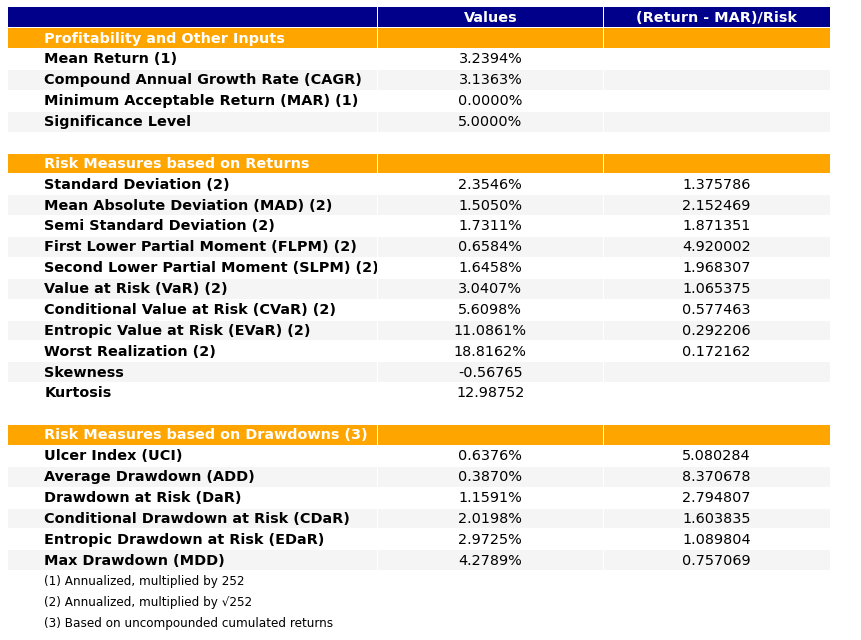

In [85]:
import riskfolio.PlotFunctions as plf
ax = plf.plot_table(returns=returns, w=w, MAR=0, alpha=0.05, ax=None)

C:\ProgramData\Anaconda3\envs\ra\lib\site-packages\riskfolio\RiskFunctions.py:348: RuntimeWarning: overflow encountered in exp
  value = np.mean(np.exp(-1 / z * a), axis=0)
C:\ProgramData\Anaconda3\envs\ra\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
C:\ProgramData\Anaconda3\envs\ra\lib\site-packages\riskfolio\RiskFunctions.py:348: RuntimeWarning: overflow encountered in exp
  value = np.mean(np.exp(-1 / z * a), axis=0)
C:\ProgramData\Anaconda3\envs\ra\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
C:\ProgramData\Anaconda3\envs\ra\lib\site-packages\riskfolio\RiskFunctions.py:348: RuntimeWarning: overflow encountered in exp
  value = np.mean(np.exp(-1 / z * a), axis=0)
C:\ProgramDat

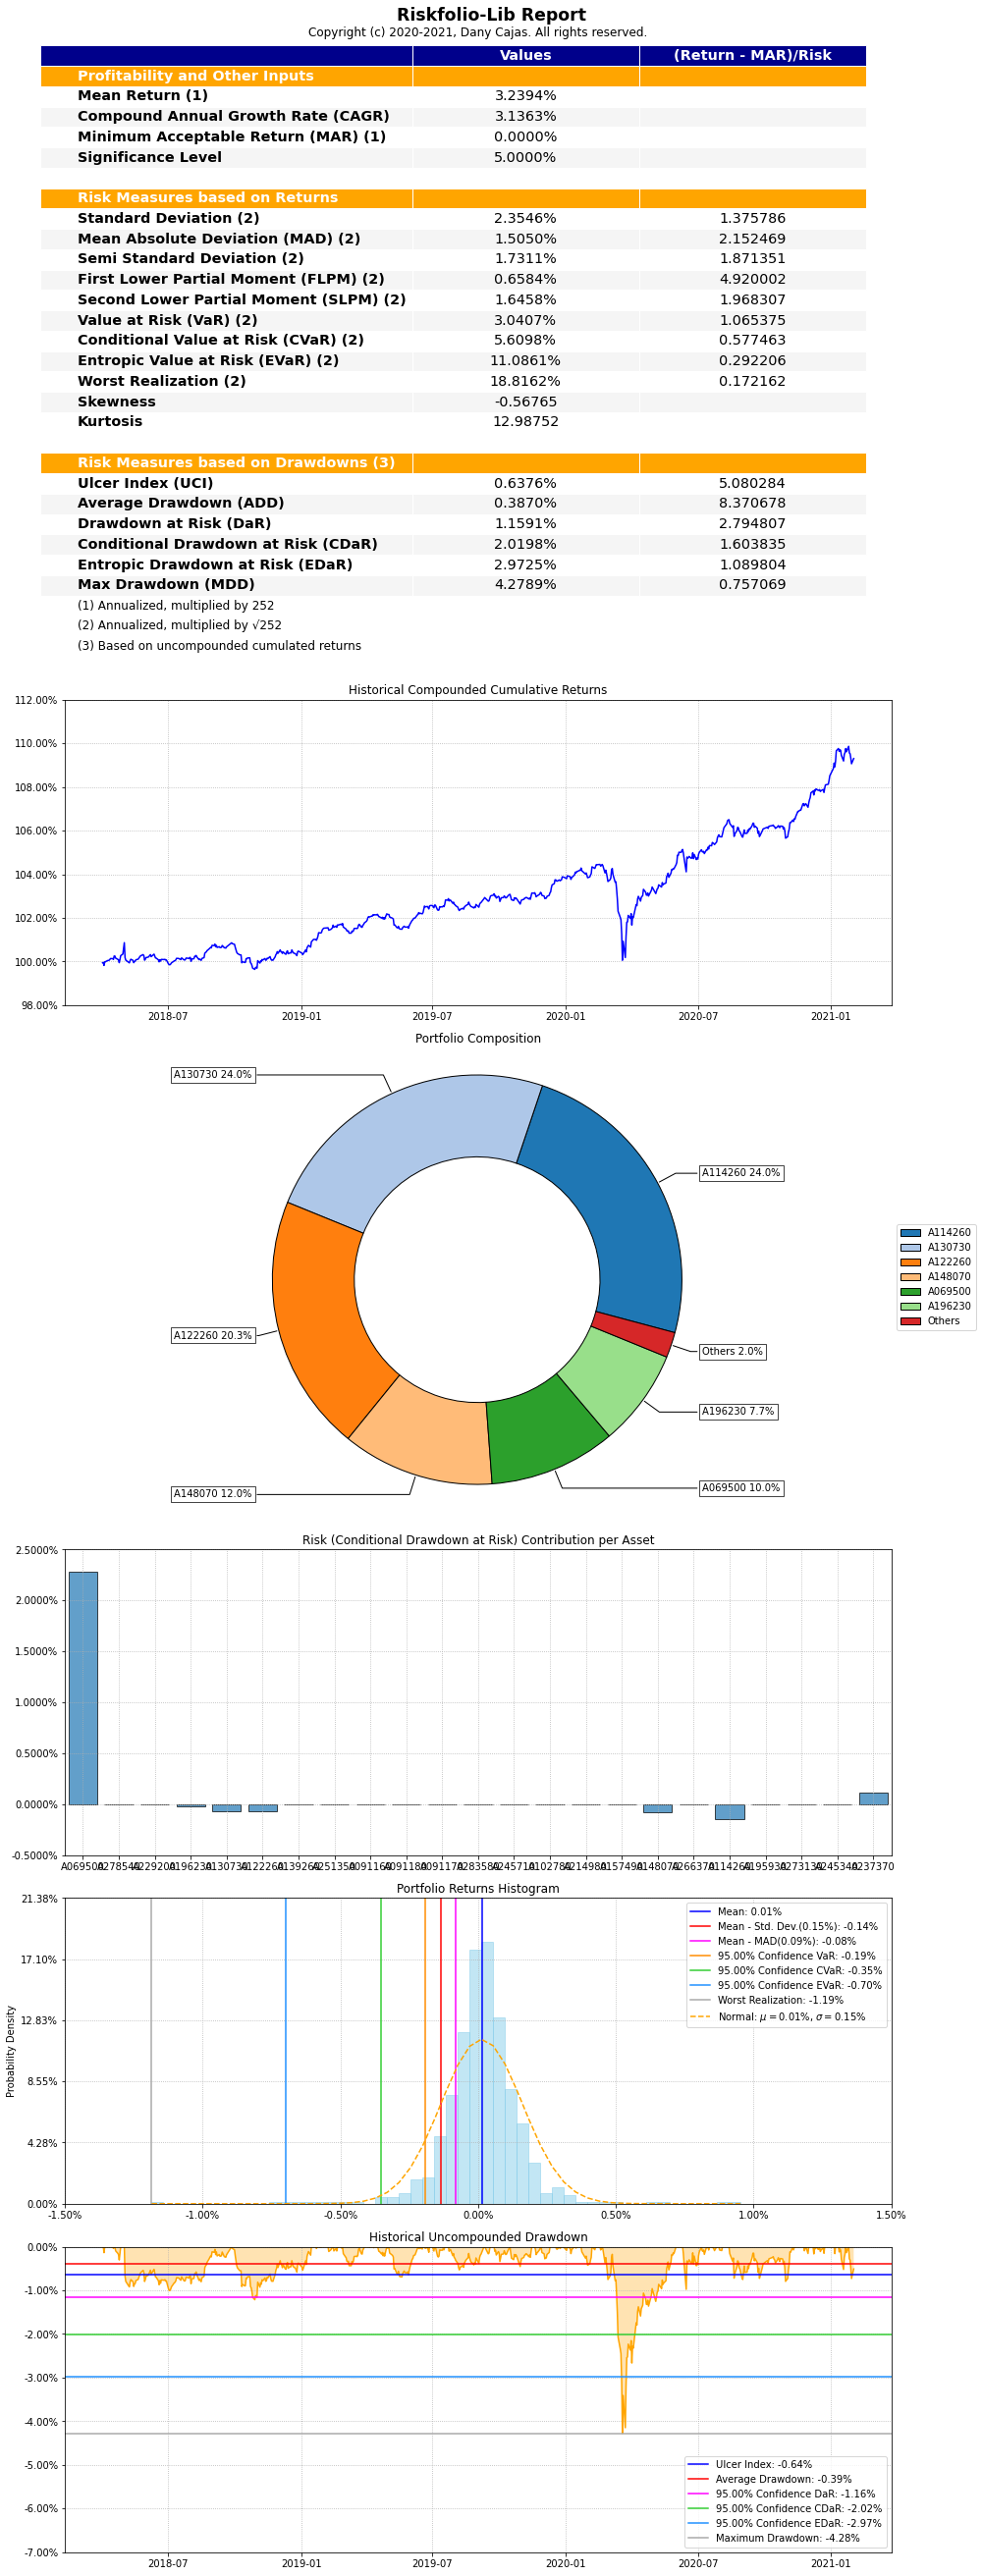

In [18]:
ax = rp.jupyter_report(returns, w, rm='CDaR', rf=0, alpha=0.05, height=6, width=14,
                       others=0.05, nrow=25)

In [23]:
fig = plt.figure()
ax[0].plot()
fig.savefig('full_figure.png')

<Figure size 432x288 with 0 Axes>

In [24]:
ax[0].savefig('d.png')

AttributeError: 'AxesSubplot' object has no attribute 'savefig'